# Supervised Learning Project Part - 2

## Banking and Finanace domain

In [112]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

## Import and warehouse data

In [113]:
df1 = pd.read_csv('Part2 - Data1.csv')
df1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [114]:
print("Shape of Data1 dataset : ",df1.shape)

Shape of Data1 dataset :  (5000, 8)


In [115]:
df2 = pd.read_csv('Part2 - Data2.csv')
df2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [116]:
print("Shape of Data2 dataset : ",df2.shape)

Shape of Data2 dataset :  (5000, 7)


In [117]:
mergedDf = pd.merge(df1, df2, how ='inner', on ='ID')
display(mergedDf)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [118]:
mergedDf.shape

(5000, 14)

## Data cleansing

In [119]:
# Info about dataset 
mergedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [120]:
#null check
mergedDf.isnull().any()

ID                     False
Age                    False
CustomerSince          False
HighestSpend           False
ZipCode                False
HiddenScore            False
MonthlyAverageSpend    False
Level                  False
Mortgage               False
Security               False
FixedDepositAccount    False
InternetBanking        False
CreditCard             False
LoanOnCard              True
dtype: bool

In [121]:
mergedDf.dtypes.to_frame(name = 'Data Type')

,Data Type
ID,int64
Age,int64
CustomerSince,int64
HighestSpend,int64
ZipCode,int64
HiddenScore,int64
MonthlyAverageSpend,float64
Level,int64
Mortgage,int64
Security,int64


In [122]:
mergedDf.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [123]:
mergedDf = mergedDf.dropna()

In [124]:
# Info about dataset 
mergedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4980 non-null   int64  
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   ZipCode              4980 non-null   int64  
 5   HiddenScore          4980 non-null   int64  
 6   MonthlyAverageSpend  4980 non-null   float64
 7   Level                4980 non-null   int64  
 8   Mortgage             4980 non-null   int64  
 9   Security             4980 non-null   int64  
 10  FixedDepositAccount  4980 non-null   int64  
 11  InternetBanking      4980 non-null   int64  
 12  CreditCard           4980 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 583.6 KB


In [125]:
#null check
mergedDf.isnull().any()

ID                     False
Age                    False
CustomerSince          False
HighestSpend           False
ZipCode                False
HiddenScore            False
MonthlyAverageSpend    False
Level                  False
Mortgage               False
Security               False
FixedDepositAccount    False
InternetBanking        False
CreditCard             False
LoanOnCard             False
dtype: bool

In [126]:
#null check
mergedDf.isnull().values.any()

False

In [127]:
#Dropping ID column which is a variable and not crucial for modelling
mergedDf = mergedDf.drop(['ID'], axis = 1)

In [128]:
display(mergedDf)

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


###### LoanOnCard is the dependendant variable

In [129]:
#Coverting the LoanOnCard column from float to int
mergedDf['LoanOnCard'] = mergedDf.LoanOnCard.astype('int64')

In [130]:
mergedDf.dtypes.to_frame(name = 'Data Type')

,Data Type
Age,int64
CustomerSince,int64
HighestSpend,int64
ZipCode,int64
HiddenScore,int64
MonthlyAverageSpend,float64
Level,int64
Mortgage,int64
Security,int64
FixedDepositAccount,int64


## Data analysis & visualisation

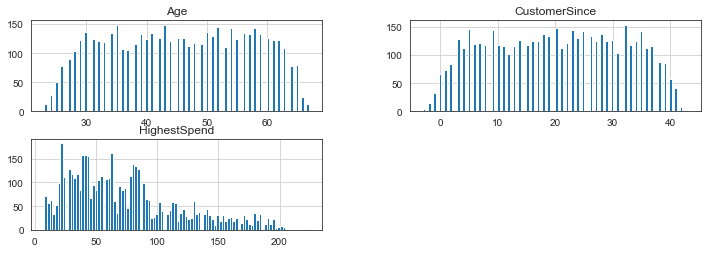

In [131]:
columns = list(mergedDf)[0:3]
mergedDf[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

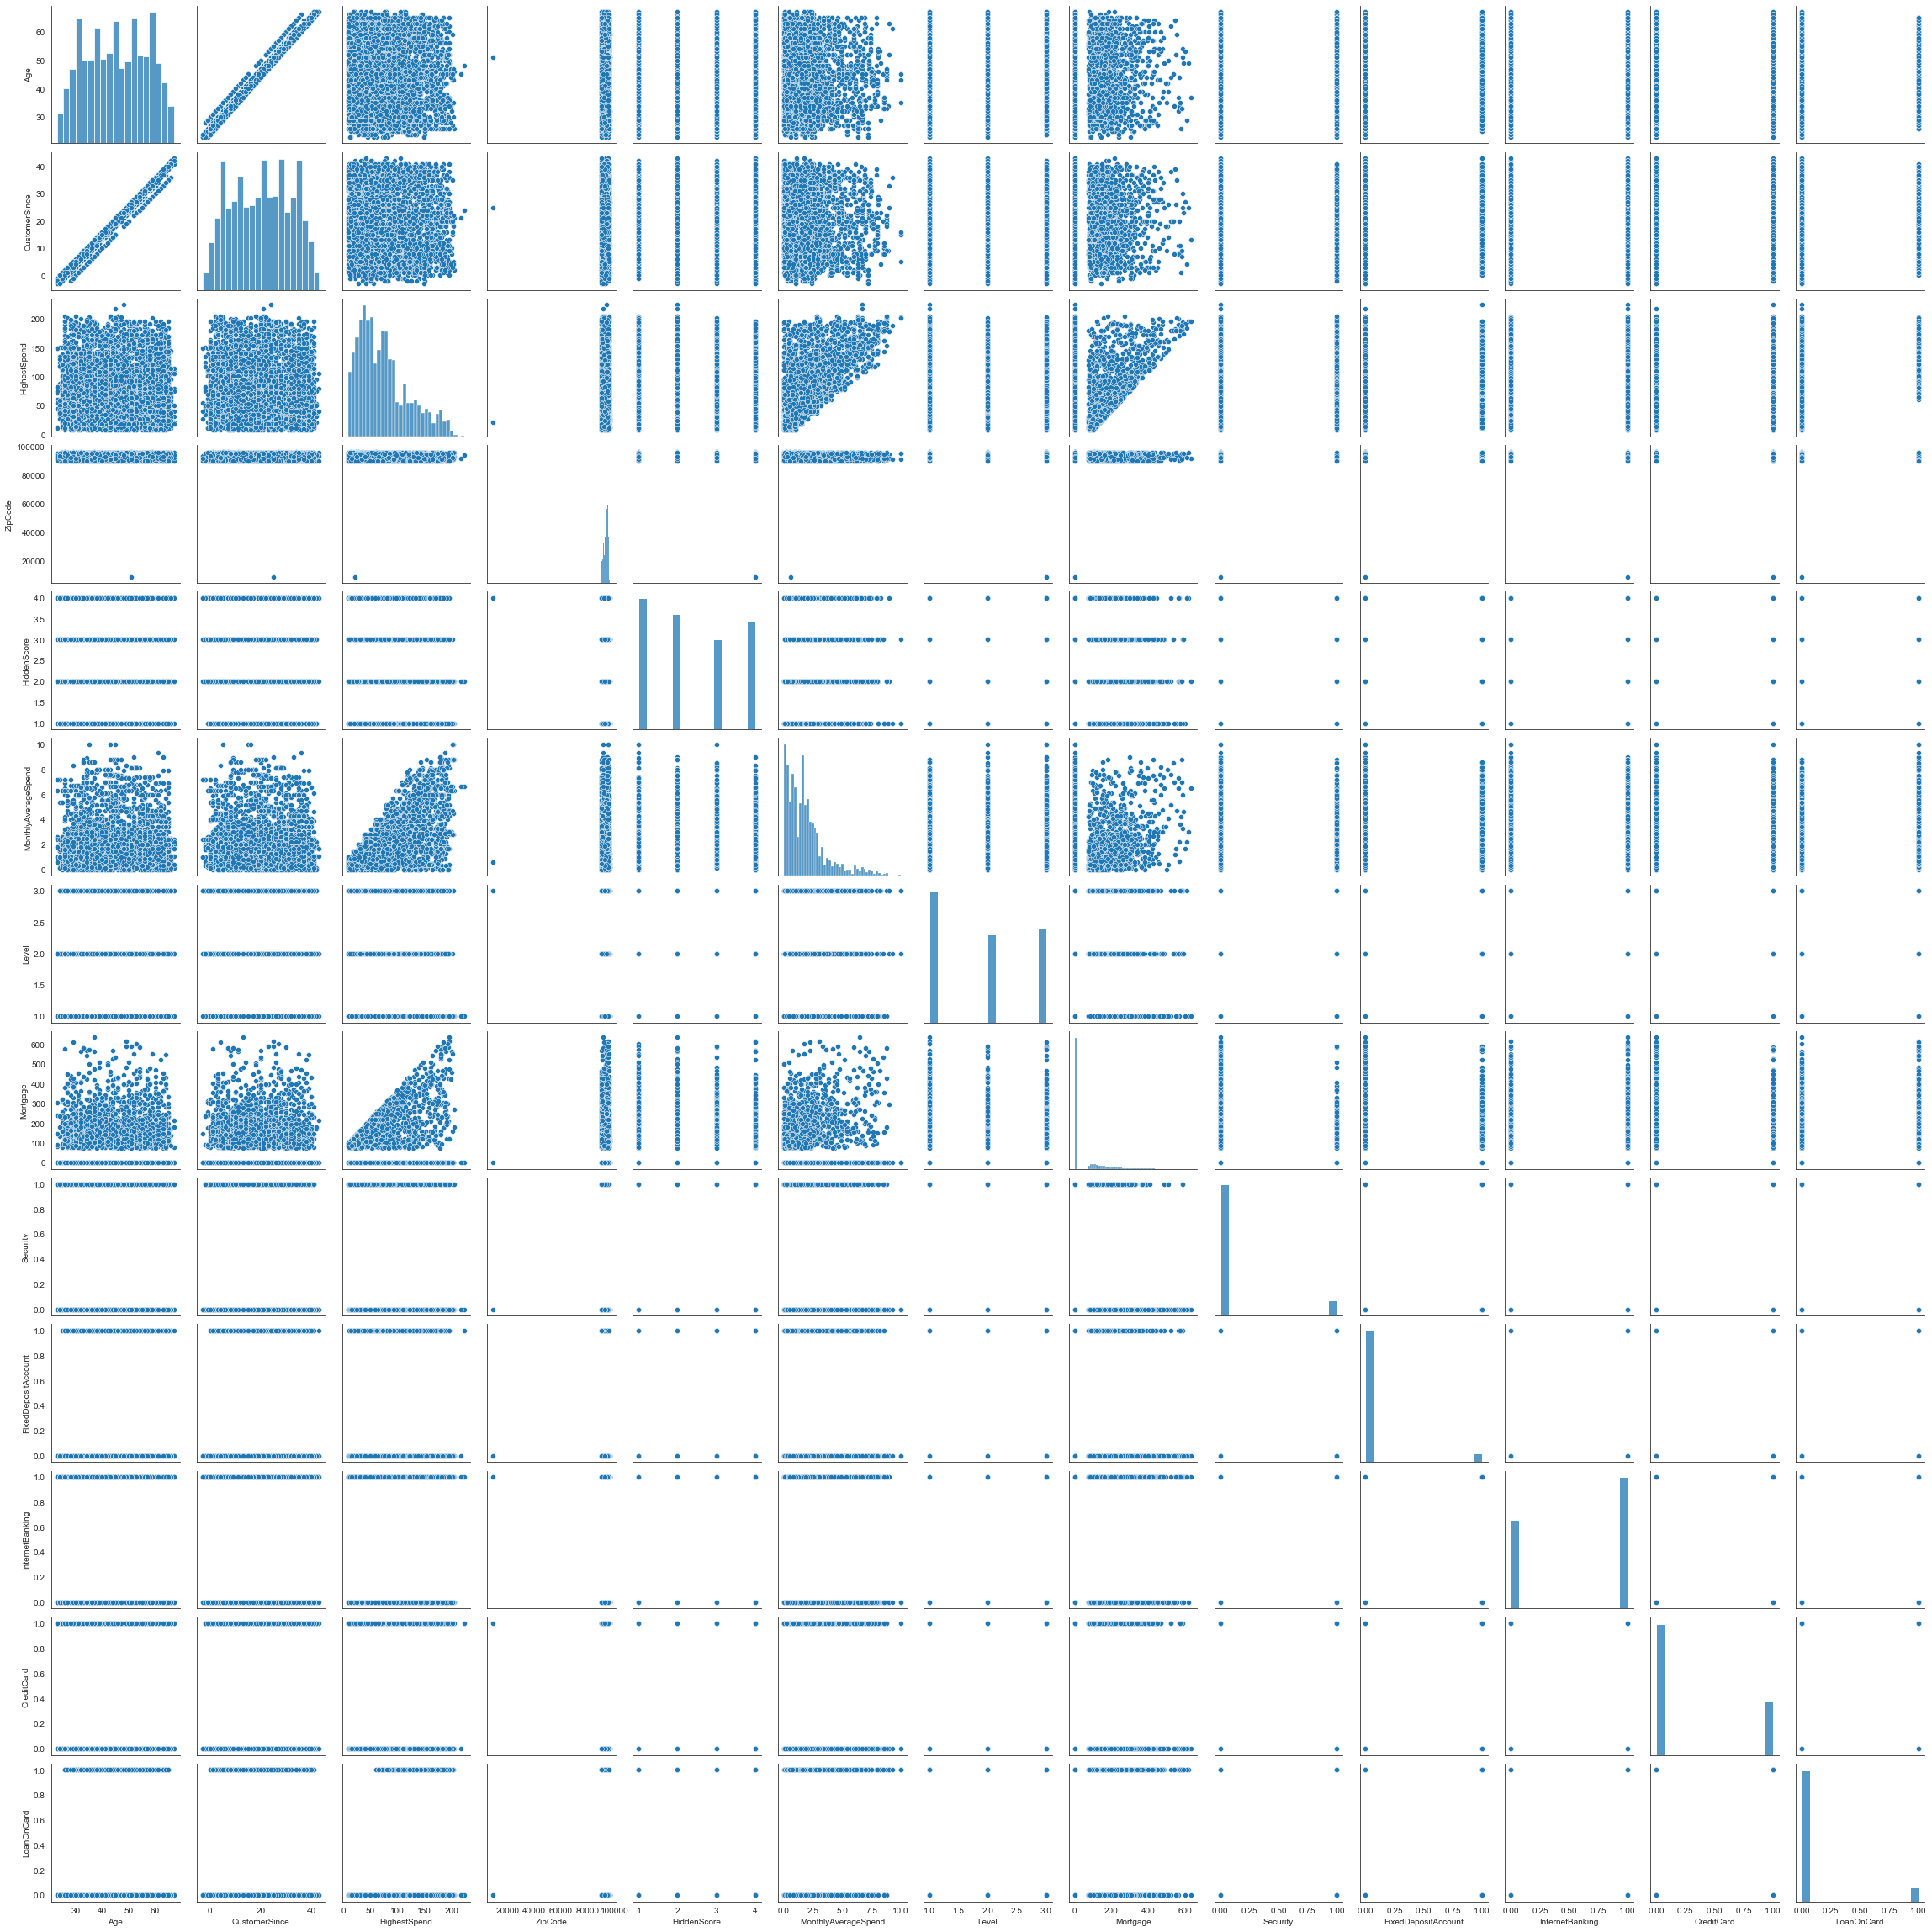

In [132]:
#Bivariate relationships of fields
sns.set_style("white")
sns.pairplot(mergedDf)
plt.show()

In [133]:
# Count of LoanOnCard in dataset
mergedDf["LoanOnCard"].value_counts()

0    4500
1     480
Name: LoanOnCard, dtype: int64

###### 480 out of 4980 i.e 9.63% of people have taken a personal loan

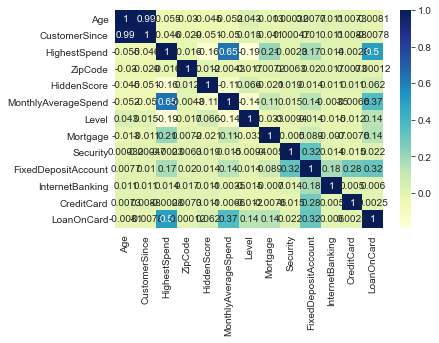

In [134]:
# Plotting the correlation heat map to understand the correlation between variables
sns.heatmap(mergedDf.corr(), annot=True, cmap="YlGnBu")
plt.show()

###### We can see that CustomerSince and Age are on only correlated variables

## Model training, testing and tuning

## Logistic regression

In [135]:
#Creating a dataframe with only independent attributes
X = mergedDf.drop(labels= "LoanOnCard", axis = 1)
Y = mergedDf["LoanOnCard"]
X.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
9,34,9,180,93023,1,8.9,3,0,0,0,0,0
10,65,39,105,94710,4,2.4,3,0,0,0,0,0
11,29,5,45,90277,3,0.1,2,0,0,0,1,0
12,48,23,114,93106,2,3.8,3,0,1,0,0,0
13,59,32,40,94920,4,2.5,2,0,0,0,1,0


In [136]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number and doing a 70-30 train test split

x_train.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
1479,28,4,43,91304,1,1.0,3,102,0,0,0,0
1727,52,26,54,90049,2,1.5,2,0,0,0,0,1
2843,27,3,20,95616,4,1.0,1,134,0,0,1,1
4106,48,22,54,93106,1,1.2,2,0,0,0,0,0
1768,43,18,128,92093,4,5.3,1,84,0,0,0,0


In [137]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.001523 -0.000193  0.036617 -0.000068  0.014609  0.006652  0.018456   

          7         8         9        10        11  intercept  
0  0.000597  0.000638  0.004867 -0.000042  0.000331  -0.000054  


###### Logistic regression Model Score with test data

In [138]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9042838018741634


###### Logistic regression Model Score with trainning data

In [139]:
model_score = model.score(x_train, y_train)
print(model_score)

0.9102122776821572


In [140]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
df_cm

,Predict 1,Predict 0
1,46,107
0,36,1305


<AxesSubplot:>

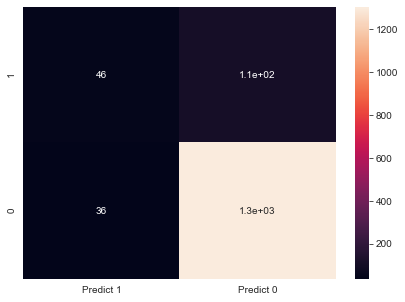

In [141]:
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): correctly predicted that 46 customers has received loan

True Negatives (TN): correctly predicted that 1305 didn't receive loan

False Positives (FP): incorrectly predicted that customers has received loan (a "Type I error") 36 

False Negatives (FN): incorrectly predicted that didn't receive loan (a "Type II error") 107 

In [142]:
print('Model Accuracy : ', model_score)
print('------')
print(metrics.classification_report(y_test, y_predict))

Model Accuracy :  0.9102122776821572
------
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1341
           1       0.56      0.30      0.39       153

    accuracy                           0.90      1494
   macro avg       0.74      0.64      0.67      1494
weighted avg       0.89      0.90      0.89      1494



## Naive Bayes classifiers

In [143]:
loan_model = GaussianNB()

loan_model.fit(x_train, y_train.ravel())

GaussianNB()

###### Naive Bayes Accuracy Score with trainning data

In [144]:
loan_train_predict = loan_model.predict(x_train)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, loan_train_predict)))

Model Accuracy: 0.8924


###### Naive Bayes Accuracy Score with testing data

In [145]:
loan_test_predict = loan_model.predict(x_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, loan_test_predict)))

Model Accuracy: 0.8849


###### Both test and train data possess a similar level of accuracy 

In [146]:
cm=metrics.confusion_matrix(y_test, loan_test_predict, labels=[1, 0])

df_cm_nb = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
df_cm_nb

,Predict 1,Predict 0
1,87,66
0,106,1235


<AxesSubplot:>

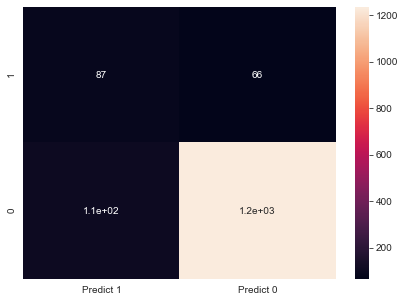

In [147]:
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_nb, annot=True)

The confusion matrix

True Positives (TP): correctly predicted that 87 customers has received loan

True Negatives (TN): correctly predicted that 1235 didn't receive loan

False Positives (FP): incorrectly predicted that customers has received loan (a "Type I error") 106 

False Negatives (FN): incorrectly predicted that didn't receive loan (a "Type II error") 66 

In [148]:
print(metrics.classification_report(y_test, loan_test_predict))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1341
           1       0.45      0.57      0.50       153

    accuracy                           0.88      1494
   macro avg       0.70      0.74      0.72      1494
weighted avg       0.90      0.88      0.89      1494



## Conclusion and improvisation

##### Since the problem statement is to model and predict using logistic and naive bayes, lets us now compare which is best among the two

In [149]:
model_data={"Technique":["Logistic","Naive Bayes"],"Accuracy":[90,88],"Recall":[30,57],"Precision":[56,45],"F1-Score":[39,50],"TP":[1305,1235],"FN":[36,106]}
ModelStat=pd.DataFrame(data=model_data).set_index(['Technique'])
ModelStat[["TP","FN","Accuracy","Precision","Recall","F1-Score"]]

,TP,FN,Accuracy,Precision,Recall,F1-Score
Technique,,,,,,
Logistic,1305,36,90,56,30,39
Naive Bayes,1235,106,88,45,57,50


Out of the applied 2 techniques Logistic Regression has high accuracy and performed betteras per the model results.

Dataset had impurties

Observations:

- Null values were detected and cleaned
- 2 dataset had to be inner joined using the ID column
- some of the categorical values has already been imputed
- Less correlation 